## TP1 — Visión por Computadora

Autor: Nicolás Rodrigues da Cruz (a2123)

### Import de librerias y definción de rutas

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

BASE = Path('../Material_TPs/TP1')
WP = BASE / 'white_patch'

### Parte 1

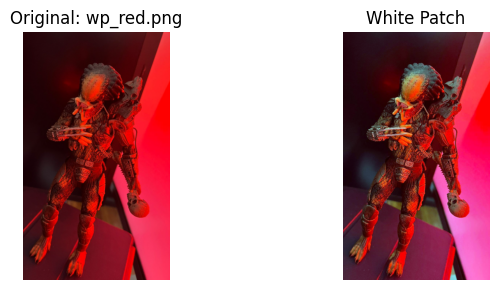

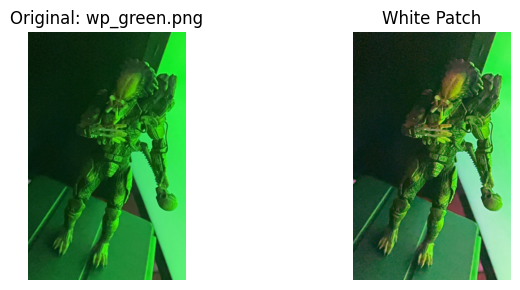

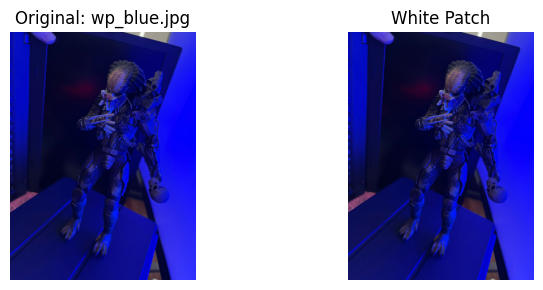

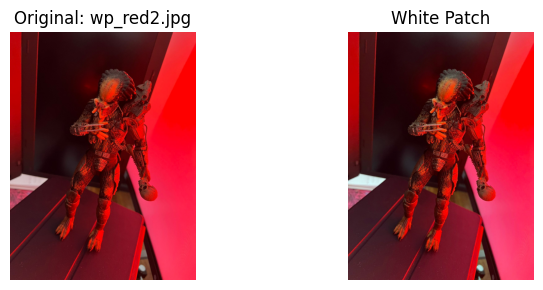

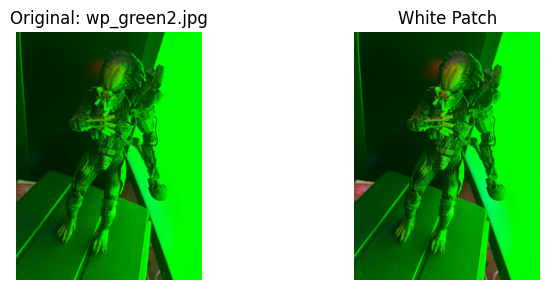

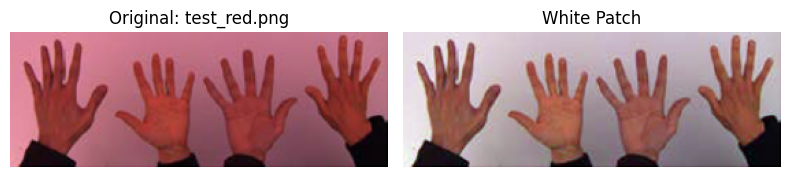

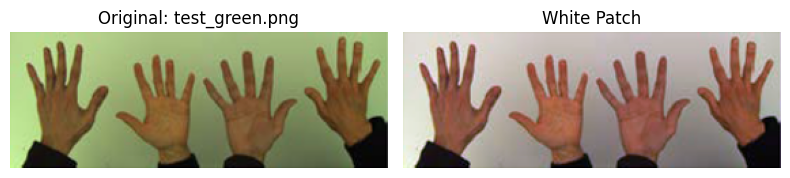

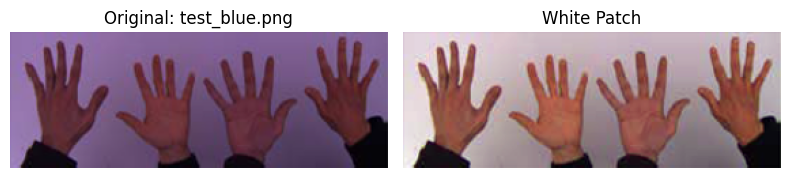

In [ ]:
#se escala cada canal para que su máximo pase a 255
def white_patch(img_bgr):
    b, g, r = cv.split(img_bgr.astype(np.float32))
    bmax = max(1.0, float(b.max()))
    gmax = max(1.0, float(g.max()))
    rmax = max(1.0, float(r.max()))
    b = b * (255.0 / bmax)
    g = g * (255.0 / gmax)
    r = r * (255.0 / rmax)
    out = cv.merge([b, g, r])
    return np.clip(out, 0, 255).astype(np.uint8)

#Defino el listado de imagenes
names = [
    'wp_red.png', 'wp_green.png', 'wp_blue.jpg',
    'wp_red2.jpg', 'wp_green2.jpg',
    'test_red.png', 'test_green.png', 'test_blue.png'
]

#se muestra el antes y después
for name in names:
    p = WP / name
    img = cv.imread(str(p))
    corr = white_patch(img)
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1); plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)); plt.title(f'Original: {name}'); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(cv.cvtColor(corr, cv.COLOR_BGR2RGB)); plt.title('White Patch'); plt.axis('off')
    plt.tight_layout(); plt.show()

- En las fotos con luces muy fuertes de un color (rojo, verde o azul), el método no logra sacar del todo ese tinte y todavía queda marcado.
- Cuando en la escena no hay nada que sea realmente blanco, la corrección inventa un “blanco” y los colores no se ven tan naturales.
- Si justo hay un reflejo muy brillante, la imagen se corrige de más y los tonos cambian demasiado.
- Con luces muy desbalanceadas, el algoritmo no alcanza a recuperar los colores reales y solo logra suavizar un poco la dominante.
- En imágenes que ya estaban bien iluminadas, al aplicar la corrección algunas partes se ven demasiado claras y se pierden detalles.

### Parte 2

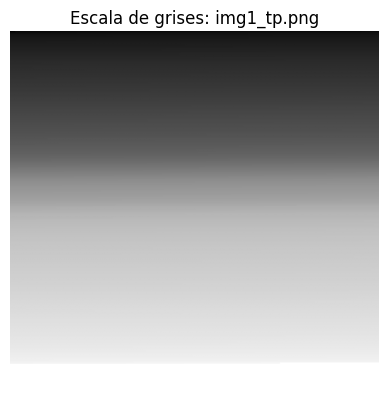

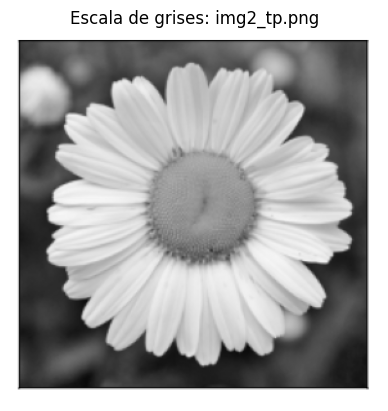

In [ ]:
#listado de imágenes de la carpeta TP1
imgs = ['img1_tp.png', 'img2_tp.png']

grays = []
for name in imgs:
    path = BASE / name
    img_gray = cv.imread(str(path), cv.IMREAD_GRAYSCALE)
    grays.append((name, img_gray))
    plt.imshow(img_gray, cmap='gray')
    plt.title(f'Escala de grises: {name}')
    plt.axis('off')
    plt.show()

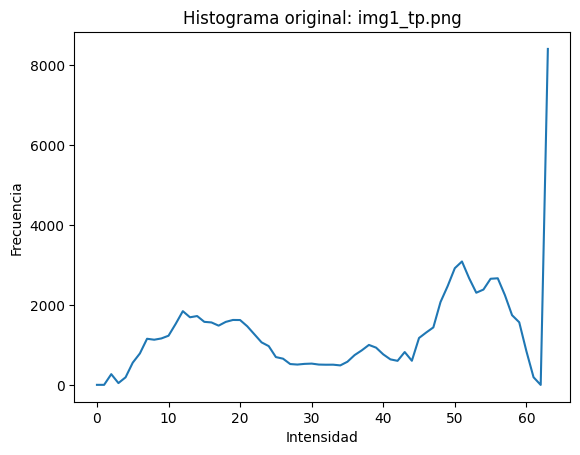

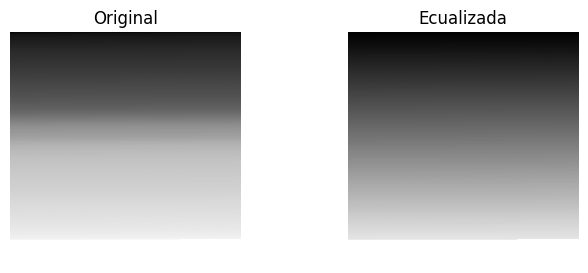

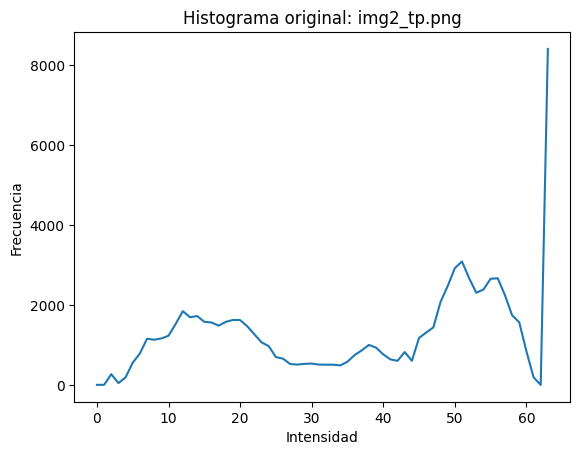

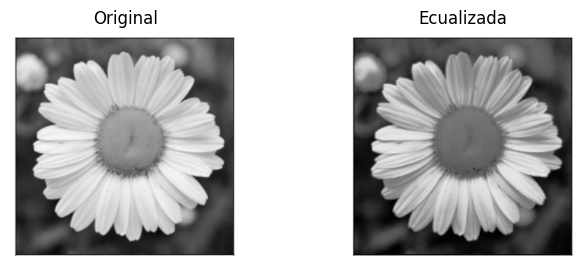

In [ ]:
#se usan 64 bins para hacer más facil la comparación entre las imagenes
for name, gray in grays:
    #histograma original
    hist = cv.calcHist([gray], [0], None, [64], [0,256])
    plt.plot(hist)
    plt.title(f'Histograma original: {name}')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    plt.show()

    #ecualizacion
    eq = cv.equalizeHist(gray)

    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1); plt.imshow(gray, cmap='gray'); plt.title('Original'); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(eq, cmap='gray'); plt.title('Ecualizada'); plt.axis('off')
    plt.show()

En este caso se ve que, aunque las dos imágenes muestran cosas distintas, los histogramas que resultan son prácticamente iguales. Esto ocurre porque el histograma no guarda información sobre dónde están los píxeles, sino solo cuántos hay de cada nivel de gris. Por eso, si dos imágenes tienen una distribución general parecida de zonas claras y oscuras, los histogramas terminan siendo similares aunque a simple vista no se parezcan demasiado.

Si pensamos en usar esto para entrenar un modelo de clasificación o detección, el histograma puede servir como una primera aproximación para distinguir imágenes con diferentes iluminaciones o contrastes. Sin embargo, no alcanza por sí solo porque no conserva la información de la forma ni de la posición de los objetos. Para algo más completo sería necesario combinarlo con otros descriptores o calcular histogramas locales en distintas regiones de la imagen.